HomeWork 1
Maduka Balasooriya (Access ID:gj7168)


This exploratory data analysis is for third grade English Language Arts (ELA) and Math test results for the school year 2016-2017 for the state of Michigan. 
Reference:
The data is downloaded from,
http://portal.datadrivendetroit.org/datasets/4539510e3ed84de1995a42ab4de10d86_0


We use mainly Pandas Python module along with Seaborn for our analysis.



In [58]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Retrieve the data into a Pandas DataFrame.
ELAMath= pd.read_csv('datasets/ELA_MATH.csv')

In [60]:
# Get some summaries of columns and data types.
print(ELAMath.info())
print(ELAMath.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 14 columns):
OBJECTID                740 non-null int64
GeoID10                 740 non-null int64
CityName                740 non-null object
CountyName              740 non-null object
ELANumAssessed_Calc     622 non-null float64
ELATotalMet_Calc        622 non-null float64
ELATotalNotMet_Calc     622 non-null float64
MATHNumAssessed_Calc    621 non-null float64
MATHTotalMet_Calc       621 non-null float64
MATHTotalNotMet_Calc    621 non-null float64
ELAPctMetCalc           622 non-null float64
MATHPctMetCalc          621 non-null float64
Shape__Area             740 non-null float64
Shape__Length           740 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 81.0+ KB
None
   OBJECTID     GeoID10        CityName      CountyName  ELANumAssessed_Calc  \
0         1  2615701620  Almer township  Tuscola County                  NaN   

   ELATotalMet_Calc  ELATotalNotMet_Calc 

**Data Cleaning Steps**

1)When looking at the data deeply, we can say there are some cities that does not contain information regarding ELA or Math scores. That means, in those cities nobod or less than five student sit for the exam.Also, each variable corresponds to ELA have 622 observations and one observation is missing in Math. Therefore, It is better to delete rows with missing values.


In [85]:
#drop null values
ELAMath.dropna(how= 'any').shape

(621, 14)

In [62]:
ELAMATHclean=ELAMath.dropna(how= 'any')

In [63]:
print(ELAMATHclean.info())
print(ELAMATHclean.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 1 to 738
Data columns (total 14 columns):
OBJECTID                621 non-null int64
GeoID10                 621 non-null int64
CityName                621 non-null object
CountyName              621 non-null object
ELANumAssessed_Calc     621 non-null float64
ELATotalMet_Calc        621 non-null float64
ELATotalNotMet_Calc     621 non-null float64
MATHNumAssessed_Calc    621 non-null float64
MATHTotalMet_Calc       621 non-null float64
MATHTotalNotMet_Calc    621 non-null float64
ELAPctMetCalc           621 non-null float64
MATHPctMetCalc          621 non-null float64
Shape__Area             621 non-null float64
Shape__Length           621 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 72.8+ KB
None
   OBJECTID     GeoID10        CityName      CountyName  ELANumAssessed_Calc  \
1         2  2615700720  Akron township  Tuscola County                 63.0   
2         3  2615781840     Vassar city  T



2)The variable 'OBJECTID' which used as an index is no longer meaningfull after remove raws which had missing values. Therefore it is reduntdant. So, the column is removed.

In [64]:
del ELAMATHclean['OBJECTID']

It is better to store the cleaned dataset.

In [65]:
ELAMATHclean.to_csv("datasets/ELAMATHclean.csv")

In [66]:
print(ELAMATHclean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 1 to 738
Data columns (total 13 columns):
GeoID10                 621 non-null int64
CityName                621 non-null object
CountyName              621 non-null object
ELANumAssessed_Calc     621 non-null float64
ELATotalMet_Calc        621 non-null float64
ELATotalNotMet_Calc     621 non-null float64
MATHNumAssessed_Calc    621 non-null float64
MATHTotalMet_Calc       621 non-null float64
MATHTotalNotMet_Calc    621 non-null float64
ELAPctMetCalc           621 non-null float64
MATHPctMetCalc          621 non-null float64
Shape__Area             621 non-null float64
Shape__Length           621 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.9+ KB
None


Now data is clean. Lets look at the data in detail.


**Question** 
Each city is one observation. How many counties are there which include all cities?

It will be interesting to find the total number of unique counties.

In [67]:
print(len(ELAMATHclean['CountyName'].unique()))

82


There are 82 counties which has students who sit for ELA and Math tests.


In [68]:
county_groups=ELAMATHclean.groupby(['CountyName'], as_index=True)

# size gives the number of cities per county
print(county_groups.size())



CountyName
Alcona County             1
Alger County              3
Allegan County           11
Alpena County             4
Antrim County             8
Arenac County             2
Baraga County             1
Barry County              4
Bay County                7
Benzie County             3
Berrien County           17
Branch County             4
Calhoun County           11
Cass County               4
Charlevoix County         5
Cheboygan County          3
Chippewa County           5
Clare County              2
Clinton County            6
Crawford County           3
Delta County              6
Dickinson County          4
Eaton County             10
Emmet County              5
Genesee County           24
Gladwin County            2
Gogebic County            4
Grand Traverse County     7
Gratiot County            4
Hillsdale County          7
                         ..
Mecosta County            5
Menominee County          4
Midland County            5
Missaukee County          1
Monroe Co

**Question**
What is the total number of students assesed from the test and total number of students pass the test in each county?

scatter plot provides us relation between number of students assesed and number of students passed the exam. We expect a linear relation between them.
X axis represents number of students pass ELA test and y axis represent number of students sit for ELA test from each county.

In [86]:
#group the cities which are in same county
county_groups_sum = county_groups.sum()

[Text(0,0.5,'Total students sit for ELT'),
 Text(0.5,0,'Total students pass for ELT')]

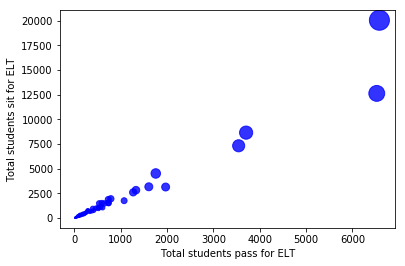

In [87]:
graph = sns.regplot(x=county_groups_sum['ELATotalMet_Calc'],fit_reg=False, y=county_groups_sum['ELANumAssessed_Calc'], color="b", scatter_kws={"s":county_groups_sum['ELANumAssessed_Calc']/50})
# size of the dot is reduced for the scatter plot by a factor of 50 for good visibility
plt.ticklabel_format(style = 'plain')  # remove exponential labels with this setting
graph.set(xlabel='Total students pass for ELT', ylabel='Total students sit for ELT')

**plot observation**
According to the scatter plot, it is clear that, There is a possitive relationship between them.

Specially,there are 4 counties out of 82 counties which has higher number of students attend and passed the ELT exam.

Lets look at the students who passed Math test.

There are 4 counties which had higher number of students attend and passed the ELT and MATH exams.

Both ELA and MATH tests have similar relationships.

Next, look at Boxplot of students passed ELA from counties.

Average number of students who passed ELA from a county :  542.5121951219512
Median of number of students who passed ELA from a county :  134.5


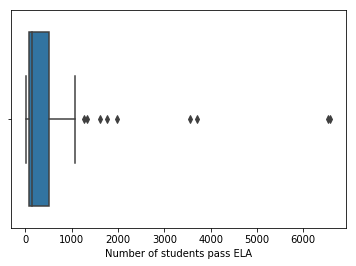

In [71]:
g1= sns.boxplot(county_groups_sum['ELATotalMet_Calc'])
g1.set(xlabel='Number of students pass ELA')
print("Average number of students who passed ELA from a county : ", county_groups_sum['ELATotalMet_Calc'].mean())
print("Median of number of students who passed ELA from a county : ", county_groups_sum['ELATotalMet_Calc'].median())

**Summary Statistics Analysis**
Average number of students pass the ELA test is 542.51 and median is 134.5. This seems there is a huge gap between average and median.
The average number of students pass the MATH test is 578.89 and median is 147.
This seems there are more students pass MATH test than ELA test since both average and median is higher for students who passed MATH test.

**Study top counties**
Lets look at top 4 counties which has highest number of students who passed tests (consider MATH test) for our analysis. 

In [72]:
n=4
top_n_counties = data=county_groups_sum.nlargest(n,'MATHTotalMet_Calc')

top_n_counties

,GeoID10,ELANumAssessed_Calc,ELATotalMet_Calc,ELATotalNotMet_Calc,MATHNumAssessed_Calc,MATHTotalMet_Calc,MATHTotalNotMet_Calc,ELAPctMetCalc,MATHPctMetCalc,Shape__Area,Shape__Length
CountyName,,,,,,,,,,,
Wayne County,107270307085,20041.0,6584.0,13457.0,20169.0,7127.0,13042.0,18.112611,18.723808,0.184596,12.313724
Oakland County,107114538770,12633.0,6527.0,6106.0,12744.0,7104.0,5640.0,20.737093,22.590199,0.242848,14.082492
Macomb County,52198970730,8660.0,3706.0,4954.0,8674.0,4082.0,4592.0,8.796002,9.642944,0.120985,6.467959
Kent County,62595299820,7328.0,3545.0,3783.0,7365.0,3772.0,3593.0,13.648380,14.393531,0.187168,9.952998


Wayne, oakland, Macomb and Kent counties has higher number of passed students out of all Michigan counties.

Lets look at the bar plot for further clarification.

Average number of students who passed MATH from a county :  578.890243902439
Median of number of students who passed MATH from a county :  147.0


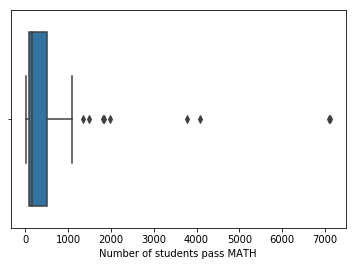

In [88]:
#draw boxplot
g2= sns.boxplot(county_groups_sum['MATHTotalMet_Calc'])
g2.set(xlabel='Number of students pass MATH')
print("Average number of students who passed MATH from a county : ", county_groups_sum['MATHTotalMet_Calc'].mean())
print("Median of number of students who passed MATH from a county : ", county_groups_sum['MATHTotalMet_Calc'].median())

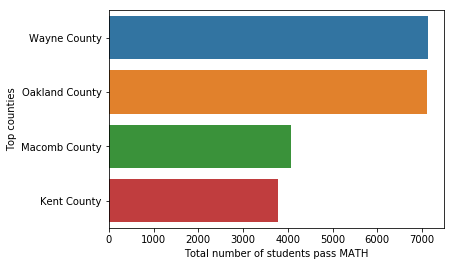

In [74]:
top_n_counties_names = top_n_counties.index.values

# Now to plot the number of students passed Math test in top n counties
gr1 = sns.barplot(y=top_n_counties.index, x='MATHTotalMet_Calc', data=top_n_counties)
gr1.set(xlabel='Total number of students pass MATH', ylabel='Top counties')
plt.show()


Wayne and Oakland counties have highest number of MATH passed students which is around 7000 and Macomb and Kent counties have passed students around 4000.


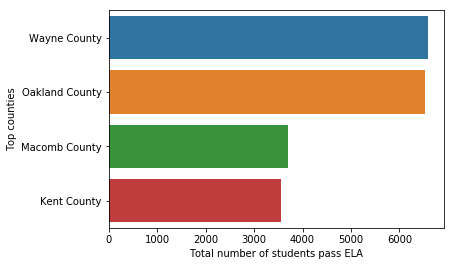

In [75]:
# Now to plot the number of students passed ELA test in top n counties
gr2 = sns.barplot(y=top_n_counties.index, x='ELATotalMet_Calc', data=top_n_counties)
gr2.set(xlabel='Total number of students pass ELA', ylabel='Top counties')
plt.show()


Wayne and Oakland counties have highest number of ELA passed students which is around 6500 and Macomb and Kent counties have passed students around 3700. Similar to earlier in top counties also have higher number os MATH passed students than ELA passed students.

**Question**
Is there a linear relationship between total number of students  sit the test and area of the county? Because we can think that when the area is large, there may have more students sit for the exams.

[Text(0,0.5,'Total area of county'), Text(0.5,0,'Total students sit for ELT')]

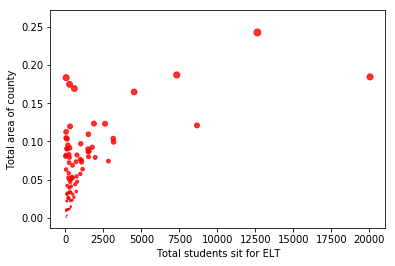

In [76]:
grap = sns.regplot(x=county_groups_sum['ELANumAssessed_Calc'],fit_reg=False, y=county_groups_sum['Shape__Area'], color="R", scatter_kws={"s":county_groups_sum['Shape__Area']*200})
# we reduce the size of the dot for the scatter plot by a factor of 100000 for good visibility
plt.ticklabel_format(style = 'plain')  # remove exponential labels with this setting
grap.set(xlabel='Total students sit for ELT', ylabel='Total area of county')

According to the graph, it is clear that there is a weak possitive relationship. However, it is not a linear positive relation. And also we can see, in some counties the area is large but the number of students who sit for the test is very low.

**question**
Is there more students who passed the ELA test than who failed ELA test?

We can use a pie chart to compare the total number of students who passed and failed the ELA test in MI state.

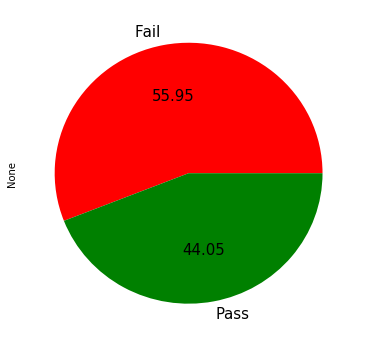

In [77]:
count = pd.Series([ELAMATHclean.ELATotalNotMet_Calc.sum(), ELAMATHclean.ELATotalMet_Calc.sum()],index=['Fail', 'Pass'])
pie = count.plot.pie( colors=['r', 'g'], autopct='%.2f',fontsize=15, figsize=(6, 6))

According to the Pie chart we can conclude that In MI, the total number of students who fail the ELA test is higher than those who pass the test.

Lets see is that same for students who sit for MATH test

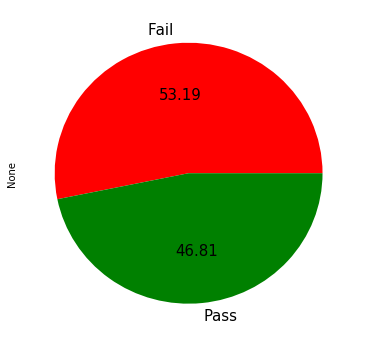

In [78]:
count2 = pd.Series([ELAMATHclean.MATHTotalNotMet_Calc.sum(), ELAMATHclean.MATHTotalMet_Calc.sum()],index=['Fail', 'Pass'])
pie = count2.plot.pie( colors=['r', 'g'], autopct='%.2f',fontsize=15, figsize=(6, 6))

It is also similar. However, the percentage of students who passed the MATH test is higher when compare with ELA test results.

As a further analysis, we can see what is the correlation between area of each city and number of students passed and sit for tests. Use heat map to identify the relations.

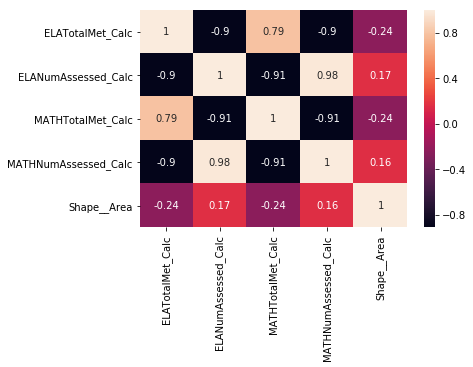

In [84]:
from sklearn.preprocessing import Normalizer
subset = ELAMATHclean[['ELATotalMet_Calc','ELANumAssessed_Calc','MATHTotalMet_Calc','MATHNumAssessed_Calc','Shape__Area']]
normalized_df = Normalizer().fit_transform(subset)

corr = pd.DataFrame(normalized_df).corr()

sns.heatmap(corr, annot=True,
        xticklabels=subset.columns.values,
        yticklabels=subset.columns.values)



According to the heat map, we can see There is a weak relation between number of students sit and pass the test  and the area of the city. This is because usually there are lot of students in major cities in MI. For example in detroit as the major industrial city most of people live around detroit.

**Conclusion:**

According to the analysis, we can conclude that there are main 4 counties which has more students sit and pass the tests.

The area of the city is not matter for the number of people live in the city, which means there is no strong relationship. 

In entire Michigan state, the number of students fail Grade 3 ELA and MATH tests are higher than the total number of students who pass the tests. This is sad thing when considering education of kids.

